# **Question 1**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

## Hyperparametre Initialisation

In [0]:
# init
states = np.arange(0, 7)
lower = 6
gamma = 0.99
w_dim = 8
dw = np.asarray([[2, 0, 0, 0, 0, 0, 0, 1],
 [0, 2, 0, 0, 0, 0, 0, 1],
 [0, 0, 2, 0, 0, 0, 0, 1],
 [0, 0, 0, 2, 0, 0, 0, 1],
 [0, 0, 0, 0, 2, 0, 0, 1],
 [0, 0, 0, 0, 0, 2, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 2]], dtype=float)
DASH = 0
SOLID = 1
p_solid = 1.0 / 7

## Algorithm Implementation

In [0]:
# take action at state, return the new state
def step(state, action):
    if action == SOLID:
        return lower
    return np.random.choice(states[: lower])

# target policy
def target_policy(state):
    return SOLID

# behaviour policy

def behaviour_policy(state):
    if np.random.binomial(1, p_solid) == 1:
        return SOLID
    return DASH

# semi-gradient td(0)
def semi_gradient_off_policy_TD(state, w, alpha):
    action = behaviour_policy(state)
    next_state = step(state, action)
    # importance sampling ratio
    if action == DASH:
        rho = 0.0
    else:
        rho = 1.0 / p_solid
    delta = gamma * np.dot(dw[next_state, :], w) - \
            np.dot(dw[state, :], w)
    delta *= rho * alpha
    w += dw[state, :] * delta
    return next_state

## Plot

100%|██████████| 1000/1000 [00:00<00:00, 40158.40it/s]


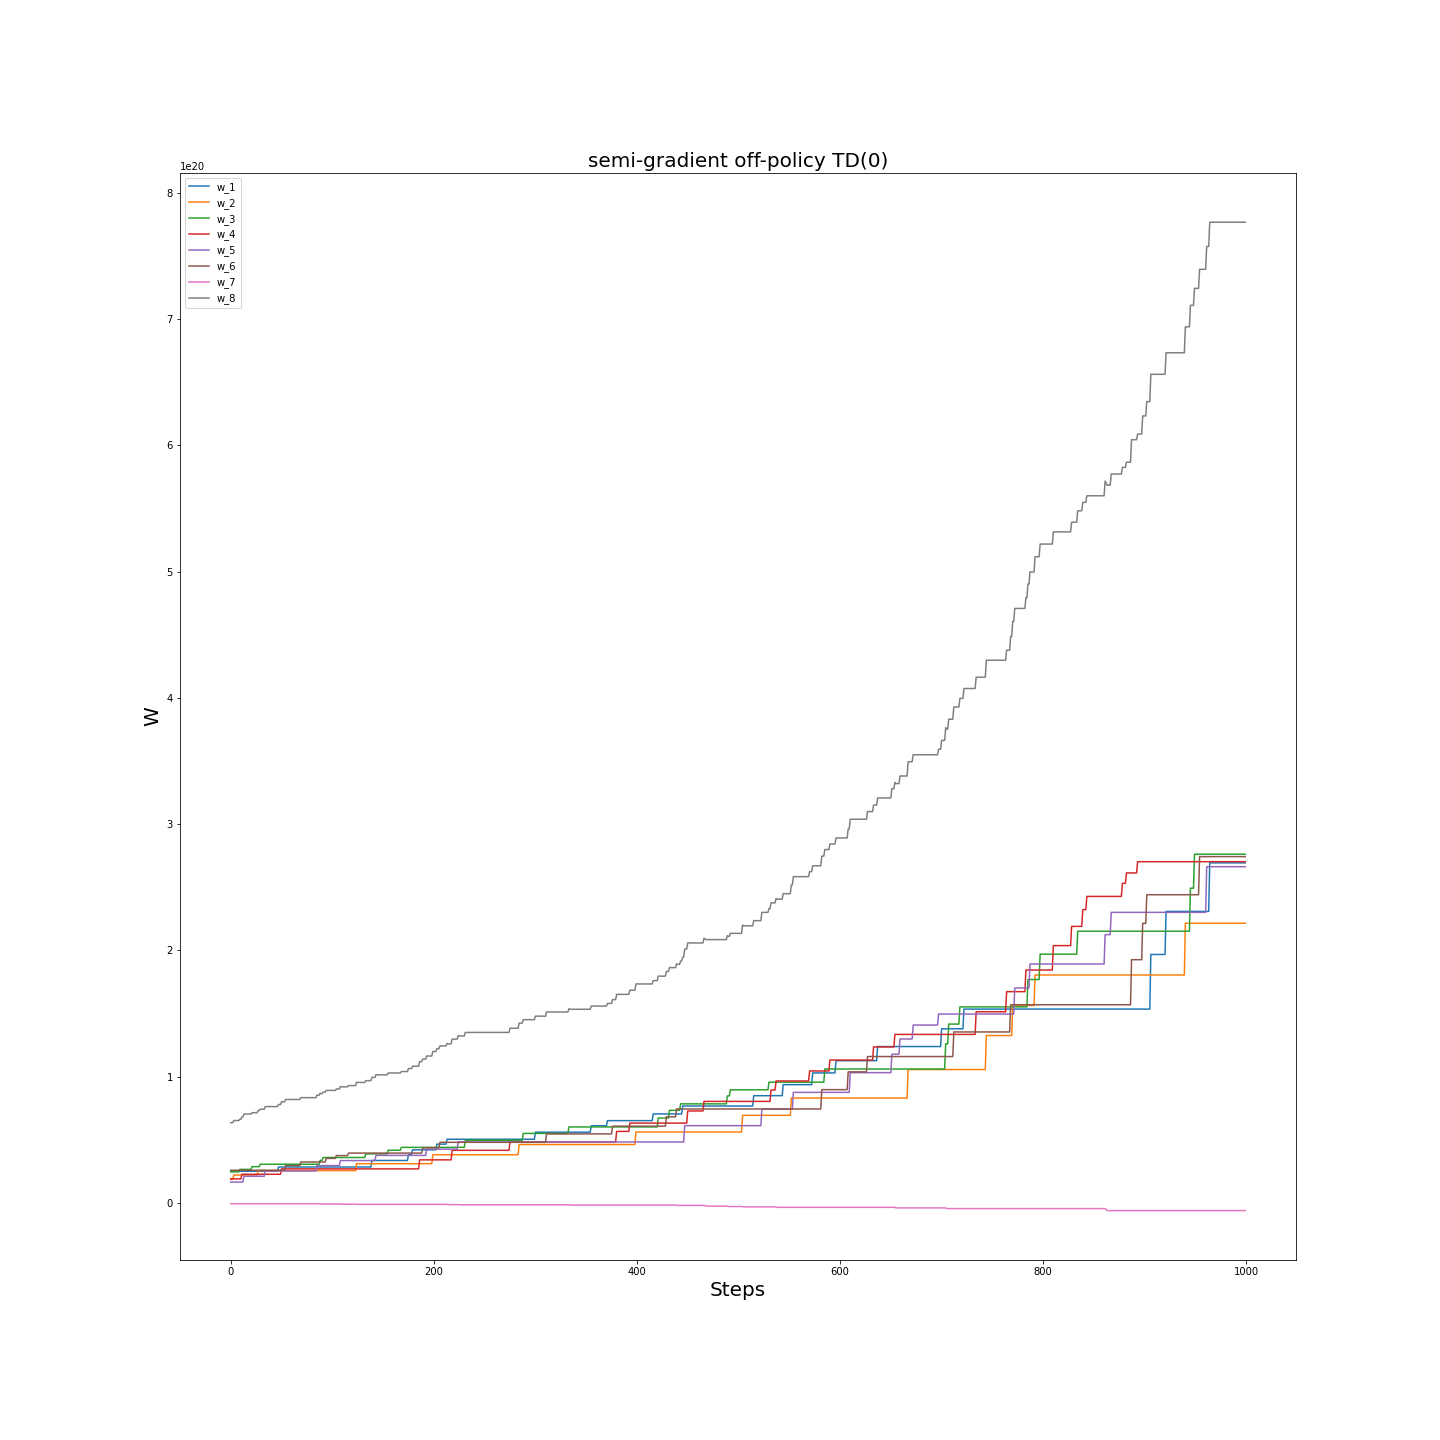

In [0]:
w = np.ones(w_dim)
w[6] = 10
alpha = 0.01
es = 1000
ws = np.zeros((w_dim, es))
ws_all = []

for seed in range(1, 20):
  random.seed(seed)
  state = np.random.choice(states)
  for e in tqdm(range(es)):
    state = semi_gradient_off_policy_TD(state, w, alpha)
    ws[:, e] = w
  ws_all.append(ws)

mean = np.asarray(ws_all).mean(axis=0)
std = np.asarray(ws_all).std(axis=0)

plt.figure(figsize=(20, 20))
for i in range(w_dim):
  plt.plot(mean[i, :], label='w_' + str(i + 1))
  plt.fill_between(np.arange(es), np.subtract(mean[i, :], std[i, :]), np.add(mean[i, :], std[i, :]), alpha = 0.5)
plt.xlabel('Steps', fontsize=20)
plt.ylabel('W', fontsize=20)
plt.title('semi-gradient off-policy TD(0)', fontsize=20)
plt.legend()
plt.savefig('plt.png')
plt.close()
from IPython.display import Image
Image('plt.png')

## Observations

We can see that we essentially replicated Fig 11.2 from the textbook. Unsurprisingly, the weights diverge to infinity. The instability occurs for any positive step size, no matter how small. It is a way to show that, in
the on-policy case, the promise of future reward must be kept and the system is kept in check. But in the o↵-policy case, a promise can be made and then, after taking an action that the target policy never would, forgotten and forgiven.

Another thing is that the variance is almost non existent for this problem. This means the experiment is highly reproducible.
